Installing the dependencies

In [1]:
!pip install tensorflow-gpu
!pip install scikit-learn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Importing the dependencies

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

Importing the data

In [3]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Splling the data

In [5]:
#Dividing the datasets in independent and dependent features
X = data.iloc[:,3:13]
Y = data.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


Feature Engineering

In [8]:
#Feature Engineering one hot encoding using dummies
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
#Dropping the actual values of geography and gender by columns
X = X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
#Concatenate the values of one hot encoded in the x geo and gender
X = pd.concat([X,geography,gender],axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [13]:
#Splittin the data in train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [14]:
X_train.shape

(8000, 11)

In [15]:
X_test.shape

(2000, 11)

In [16]:
#Feaure Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train[0]

array([ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
        0.64259497, -1.03227043,  1.10643166, -0.5698444 ,  1.74309049,
       -1.09168714])

In [18]:
X_test[0]

array([-0.55204276, -0.36890377,  1.04473698,  0.8793029 , -0.92159124,
        0.64259497,  0.9687384 ,  1.61085707,  1.75486502, -0.57369368,
       -1.09168714])

ANN Implementation

In [19]:
#Importing the important libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU

In [20]:
#Creating the sequential
classifier = Sequential()

In [21]:
#Adding the input layer also adding the dropout layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [22]:
#Adding the first hidden layer also adding the dropout layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.4))

In [23]:
#Adding the second hidden layer also adding the dropout layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [24]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [25]:
#Now let us compile all the layers
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
#if we have to use the adam optimizer with the learning  rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [27]:
#Now let us compile with the learning rate opt
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
#Now let us train the model
#model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000)


In [29]:
#In the above training it trains till 1000 epochs which is not efficient
#So to get the best val_loss with the best accuracy so that the model stops at that epoch we use something called as
#Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [30]:
#Now training the model with the early stopping
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7651 - loss: 0.5540 - val_accuracy: 0.7955 - val_loss: 0.4418
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8038 - loss: 0.4604 - val_accuracy: 0.7948 - val_loss: 0.4439
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8004 - loss: 0.4681 - val_accuracy: 0.7955 - val_loss: 0.4339
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7964 - loss: 0.4564 - val_accuracy: 0.7959 - val_loss: 0.4242
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8057 - loss: 0.4437 - val_accuracy: 0.8164 - val_loss: 0.4085
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8055 - loss: 0.4431 - val_accuracy: 0.8061 - val_loss: 0.4055
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8302 - loss: 0.4117 - val_accuracy: 0.8273 - val_loss: 0.4008
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8232 - loss: 0.4172 

In [31]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

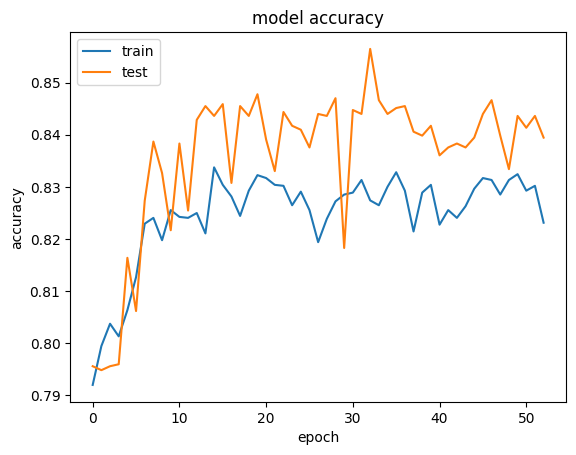

In [32]:
#Summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
#Making the predictions and evaluating the model

#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [34]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1577,   18],
       [ 277,  128]])

In [35]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test,y_pred)
score

0.8525

In [36]:
#Get the weights
classifier.get_weights()

[array([[-4.48983788e-01, -7.01444969e-02,  8.23092386e-02,
         -4.66888219e-01, -1.48202181e-01,  7.96705902e-01,
         -5.40787935e-01,  6.89391434e-01, -6.86789095e-01,
         -4.08346832e-01, -1.07653625e-01],
        [-3.81799078e+00, -1.63425524e-02, -3.43408227e+00,
          1.77534688e+00,  6.97379947e-01, -2.36657095e+00,
          4.31409061e-01, -3.10099030e+00,  3.80403042e-01,
          9.15492237e-01,  1.97169769e+00],
        [-5.88921458e-02,  5.32417856e-02,  2.86556691e-01,
         -4.26129311e-01,  1.63106561e-01,  2.45714694e-01,
         -1.73983917e-01, -3.46798629e-01, -2.76007235e-01,
          6.83987498e-01, -5.17473578e-01],
        [-8.41201961e-01, -1.73966035e-01, -1.28560376e+00,
         -1.21467972e+00,  3.45486492e-01, -3.10517025e+00,
         -2.83454752e+00, -5.65010726e-01, -2.79103255e+00,
         -2.02796316e+00,  7.27130398e-02],
        [ 3.15674953e-02, -1.84774861e-01,  1.74017921e-01,
          9.62111875e-02,  3.44760156e+00,  